In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

import pandas_datareader as pdr
import FinanceDataReader as fdr
from pykrx import stock
import talib
from talib import MA_Type
import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)
#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf


import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [29]:
# ! pip install -U finance-datareader
# ! pip install finance-datareader
# ! pip install pykrx
# ! pip install bokeh
# ! pip install yfinance
# ! pip install pandas_datareader

In [30]:
# !pip install talib-binary

In [31]:
df = stock.get_market_ohlcv ( "20190101" , "20210303" , "005930" )

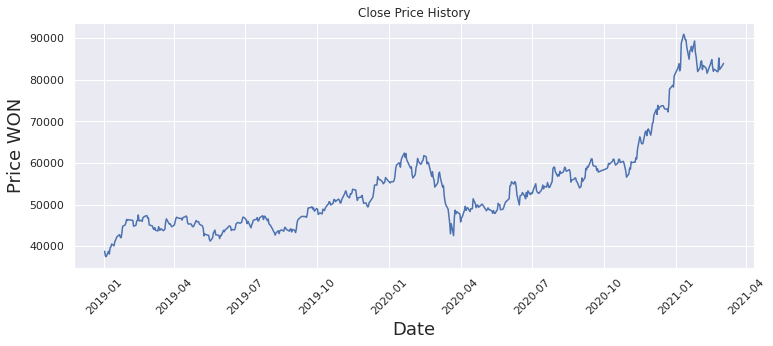

In [32]:
plt.figure(figsize=(12.2,4.5))
plt.plot( df['종가'], label='종가')
plt.xticks(rotation=45)
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price WON' , fontsize=18)
plt.show()

In [33]:
OBV = []
OBV.append(0)
for i in range(1, len(df.종가)):
    if df.종가[i] > df.종가[i-1]:
        OBV.append(OBV[-1] + df.거래량[i])
    elif df.종가[i] < df.종가[i-1]:
        OBV.append( OBV[-1]- df.거래량[i])
    else:
        OBV.append(OBV[-1])

In [34]:
df['OBV'] = OBV
df['OBV_EMA']= df['OBV'].ewm(com=20).mean()

In [35]:
def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(0, len(signal)):
    
        if signal[col1][i] > signal[col2][i] and flag !=1:
            sigPriceBuy.append(signal['종가'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        
        elif signal[col1][i] < signal[col2][i] and flag !=0:
            sigPriceSell.append(signal['종가'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
    
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    
    return(sigPriceBuy, sigPriceSell)

In [36]:
x =buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price']= x[1]

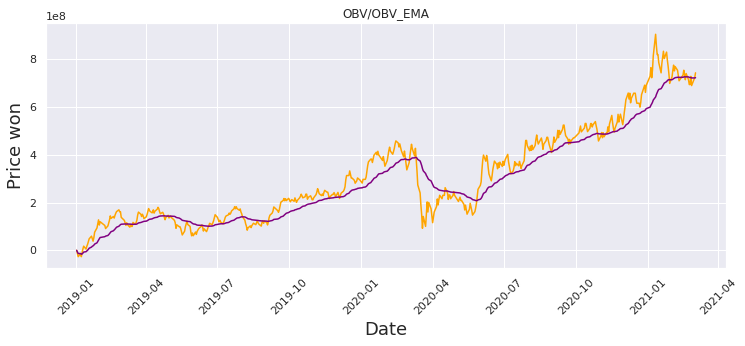

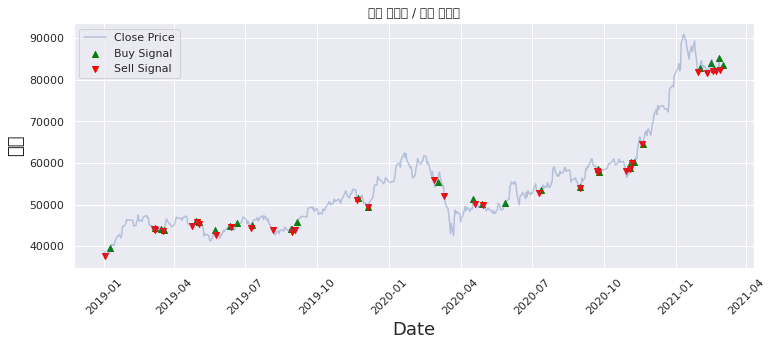

In [40]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic') 
sns.set()

plt.figure(figsize=(12.2,4.5))
plt.plot(df['OBV'], label = 'OBV', color= 'orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color='purple')
plt.xticks(rotation=45)
plt.title('OBV/OBV_EMA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price won', fontsize=18)
plt.show()

plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color= 'green',
           label='Buy Signal', marker = '^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color= 'red',
           label='Sell Signal', marker = 'v', alpha=1)
plt.plot(df['종가'], label='Close Price', alpha= 0.35)
plt.xticks(rotation=45)
plt.title('매수 시그널 / 매도 시그널')
plt.xlabel('Date', fontsize=18)
plt.ylabel('종가', fontsize=18)
plt.legend(loc='upper left')
plt.show()

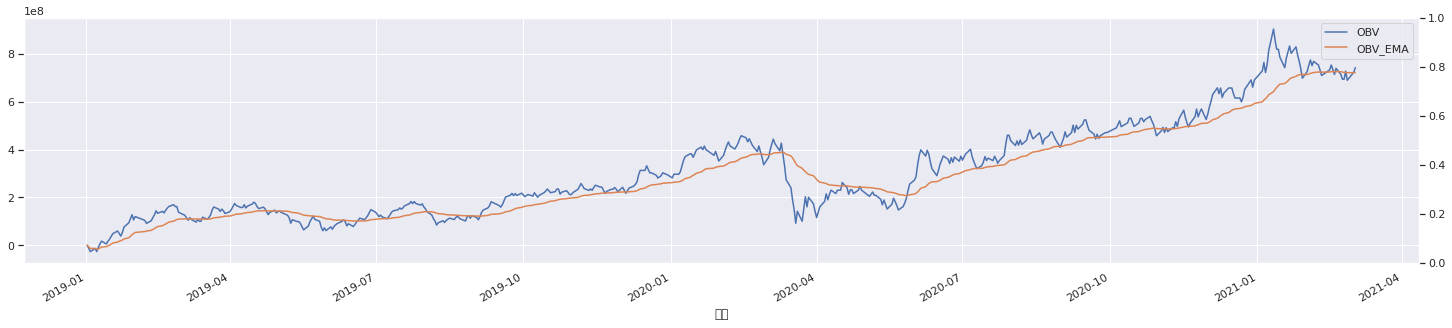

In [43]:
fig, ax1 =plt.subplots(figsize = (25, 5))

df[['OBV','OBV_EMA']].plot(ax=ax1)

for i in range(len(df.index)):
    if df['Buy_Signal_Price'].values[i] > df['Sell_Signal_Price'].values[i]:  # 거래량 지표 매수신호
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')} {df['OBV_EMA'].values[i]: .2f}")
        ax1.plot(df.index.values[i], df['Buy_Signal_Price'].values[i], 'bv')
    elif df['Buy_Signal_Price'].values[i] < df['Sell_Signal_Price'].values[i]:  # 거래량 지표 매도신호
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')} {df['OBV_EMA'].values[i]: .2f}")
        ax1.plot(df.index.values[i], df['Buy_Signal_Price'].values[i], 'r^')
        
ax2 = ax1.twinx()
#df['Close'].plot(ax=ax2,  color='green', linestyle='dotted')
ax2.grid(False)
#ax2.legend()

plt.show()
        

In [45]:
# ! pip install backtrader
# ! pip install backtesting

In [46]:
df

,시가,고가,저가,종가,거래량,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
날짜,,,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0,0.000000e+00,NaN,NaN
2019-01-03,38300,38550,37450,37600,12471493,-12471493,-6.387838e+06,NaN,37600.0
2019-01-04,37450,37600,36850,37450,14108958,-26580451,-1.344965e+07,NaN,NaN
2019-01-07,38000,38900,37800,38750,12748997,-13831454,-1.355219e+07,NaN,NaN
2019-01-08,38000,39200,37950,38100,12756554,-26588008,-1.641976e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2021-02-24,81800,83600,81300,82000,26807651,694182879,7.230082e+08,NaN,NaN
2021-02-25,84000,85400,83000,85300,34155986,728338865,7.232620e+08,85300.0,NaN
2021-02-26,82800,83400,82000,82500,38520800,689818065,7.216695e+08,NaN,82500.0


In [75]:
이마트 = stock.get_market_ohlcv("20180301", "20190301", "139480")
print(이마트.head())

                시가      고가      저가      종가     거래량
날짜                                                
2018-03-02  298500  314000  298000  312000   95962
2018-03-05  309500  317000  295500  298500  108244
2018-03-06  299000  303000  293500  297500   86213
2018-03-07  294000  300000  293000  293000   84469
2018-03-08  297500  303500  288500  294000  116457


In [79]:
이마트 = 이마트[이마트['SMA20'].isna()==False]  # 널값 제거

In [76]:
이마트['SMA5']= 이마트['종가'].rolling(window=5).mean()
이마트['SM10']= 이마트['종가'].rolling(window=10).mean()
이마트['SMA20']= 이마트['종가'].rolling(window=20).mean()
이마트.head()

,시가,고가,저가,종가,거래량,SMA5,SM10,SMA20
날짜,,,,,,,,
2018-03-02,298500,314000,298000,312000,95962,NaN,NaN,NaN
2018-03-05,309500,317000,295500,298500,108244,NaN,NaN,NaN
2018-03-06,299000,303000,293500,297500,86213,NaN,NaN,NaN
2018-03-07,294000,300000,293000,293000,84469,NaN,NaN,NaN
2018-03-08,297500,303500,288500,294000,116457,299000.0,NaN,NaN


In [81]:
이마트.columns = ['open', 'high', 'low', 'close', 'volume', 'SMA5', 'SMA10','SMA20']

In [83]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

from pandas_datareader import data as pdr
import yfinance as yf

fig = go.Figure(
    data = [
        go.Scatter(x=이마트.index, y=이마트['close'], name='이마트'),
        go.Scatter(x=이마트.index, y=이마트['SMA5'], name='5일선'),
        go.Scatter(x=이마트.index, y=이마트['SMA10'], name='10일선'),
        go.Scatter(x=이마트.index, y=이마트['SMA20'], name='20일선')
       
    ]
)


fig.show(renderer='colab')

In [84]:
import numpy
import talib
from talib import abstract

In [86]:
import talib.abstract as ta
from pandas_datareader import data


# ta-lib로 5기간 종가 이동평균 계산
talib_ma5 = ta.MA(이마트['close'], timeperiod=5)
talib_ma10 = ta.MA(이마트['close'], timeperiod=10)
talib_ma20 = ta.MA(이마트['close'], timeperiod=20)

# pandas 기능을 이용하여 5기간 이동평균 계산
# 진에어['SAM5']



In [87]:
이마트['talib_ma5']=talib_ma5
이마트['talib_ma10']=talib_ma10
이마트['talib_ma20']=talib_ma20


In [90]:
이마트.head(10)

,open,high,low,close,volume,SMA5,SMA10,SMA20,talib_ma5,talib_ma10,talib_ma20
날짜,,,,,,,,,,,
2018-03-29,270000,271500,266500,270500,99913,273000.0,277600.0,285375.0,NaN,NaN,NaN
2018-03-30,270500,276000,270500,273500,83224,272100.0,276250.0,283450.0,NaN,NaN,NaN
2018-04-02,272500,276000,270000,273500,103311,271500.0,275550.0,282200.0,NaN,NaN,NaN
2018-04-03,274000,286000,270500,284000,136722,274400.0,275650.0,281525.0,NaN,NaN,NaN
2018-04-04,283000,291500,282000,289500,141013,278200.0,276500.0,281350.0,278200.0,NaN,NaN
2018-04-05,290500,295000,280000,283500,130373,280800.0,276900.0,280825.0,280800.0,NaN,NaN
2018-04-06,283500,288000,279000,287500,75373,283600.0,277850.0,279950.0,283600.0,NaN,NaN
2018-04-09,290500,290500,283500,288000,60069,286500.0,279000.0,280025.0,286500.0,NaN,NaN
2018-04-10,285500,292000,283000,290500,62953,287800.0,281100.0,280450.0,287800.0,NaN,NaN


In [136]:
df = stock.get_market_ohlcv ( "20180301" , "20190301" , "000660" )

In [137]:
OBV = []
OBV.append(0)
for i in range(1, len(df.종가)):
    if df.종가[i] > df.종가[i-1]:
        OBV.append(OBV[-1] + df.거래량[i])
    elif df.종가[i] < df.종가[i-1]:
        OBV.append( OBV[-1]- df.거래량[i])
    else:
        OBV.append(OBV[-1])

In [138]:
df['OBV'] = OBV
df['OBV_EMA']= df['OBV'].ewm(com=10).mean()

In [139]:
def buy_sell(signal, col1, col2):
    sigPriceBuy = []
    sigPriceSell= []
    flag = -1
    
    for i in range(0, len(signal)):
    
        if signal[col1][i] > signal[col2][i] and flag !=1:
            sigPriceBuy.append(signal['종가'][i])
            sigPriceSell.append(np.nan)
            flag = 1
        
        elif signal[col1][i] < signal[col2][i] and flag !=0:
            sigPriceSell.append(signal['종가'][i])
            sigPriceBuy.append(np.nan)
            flag = 0
    
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
    
    return(sigPriceBuy, sigPriceSell)

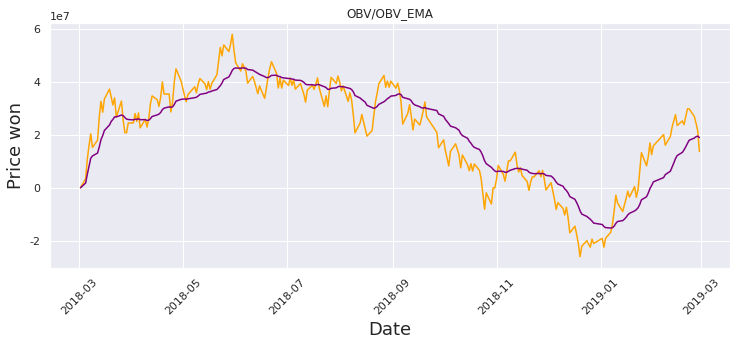

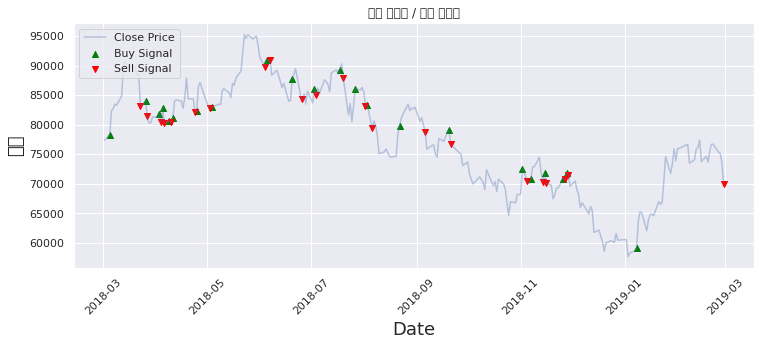

In [142]:
plt.figure(figsize=(12.2,4.5))
plt.plot(df['OBV'], label = 'OBV', color= 'orange')
plt.plot(df['OBV_EMA'], label='OBV_EMA', color='purple')
plt.xticks(rotation=45)
plt.title('OBV/OBV_EMA')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price won', fontsize=18)
plt.show()

plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color= 'green',
           label='Buy Signal', marker = '^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'], color= 'red',
           label='Sell Signal', marker = 'v', alpha=1)
plt.plot(df['종가'], label='Close Price', alpha= 0.35)
plt.xticks(rotation=45)
plt.title('매수 시그널 / 매도 시그널')
plt.xlabel('Date', fontsize=18)
plt.ylabel('종가', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [141]:
x =buy_sell(df, 'OBV', 'OBV_EMA')
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price']= x[1]
df

,시가,고가,저가,종가,거래량,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
날짜,,,,,,,,,
2018-03-02,76300,77800,75900,77400,2673152,0,0.000000e+00,NaN,NaN
2018-03-05,77500,78900,77100,78300,3415061,3415061,1.788841e+06,78300.0,NaN
2018-03-06,80100,82500,80000,82400,7588369,11003430,5.157316e+06,NaN,NaN
2018-03-07,83600,83900,82400,82700,4992841,15996271,8.265838e+06,NaN,NaN
2018-03-08,83900,84300,81800,83500,4440076,20436347,1.118452e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-02-22,75600,76700,75300,76700,1882653,29882890,1.800151e+07,NaN,NaN
2019-02-25,77300,77600,74800,75400,2865712,27017178,1.882112e+07,NaN,NaN
2019-02-26,75000,75900,74100,75200,2483512,24533666,1.934044e+07,NaN,NaN


In [167]:
df

,시가,고가,저가,종가,거래량,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
날짜,,,,,,,,,
2018-03-02,76300,77800,75900,77400,2673152,0,0.000000e+00,0,0
2018-03-05,77500,78900,77100,78300,3415061,3415061,1.788841e+06,78300,0
2018-03-06,80100,82500,80000,82400,7588369,11003430,5.157316e+06,0,0
2018-03-07,83600,83900,82400,82700,4992841,15996271,8.265838e+06,0,0
2018-03-08,83900,84300,81800,83500,4440076,20436347,1.118452e+07,0,0
...,...,...,...,...,...,...,...,...,...
2019-02-22,75600,76700,75300,76700,1882653,29882890,1.800151e+07,0,0
2019-02-25,77300,77600,74800,75400,2865712,27017178,1.882112e+07,0,0
2019-02-26,75000,75900,74100,75200,2483512,24533666,1.934044e+07,0,0


In [116]:
fig, ax1 = plt.subplots(figsize = (20, 5))

# Slow %K, Slow %D를 그려서 확인
df[['OBV', 'OBV_EMA']].plot(ax=ax1)
ax1.grid(False)
# ax.hlines([20,80], df.index.min(), df.index.max(), color ="green", linestyle="--")

for i in range(len(df.index)):
    if df["RSI"].values[i] <= 30 and (df["RSI"].values[i] > df["RSI_signal"].values[i]) :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['RSI'].values[i], 'o',color='red')
    elif df["RSI"].values[i] >= 70 and (df["RSI"].values[i] < df["RSI_signal"].values[i]) :  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Close'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['RSI'].values[i], 'o',color='red')    
ax1.plot(df.index, [70] * len(df.index), label="overbought",color='red')
ax1.plot(df.index, [30] * len(df.index), label="oversold",color='blue')
ax2 = ax1.twinx()
df['Close'].plot(ax=ax2,  color='green', linestyle='dotted')
ax2.grid(False)
ax1.legend(loc='upper left')
ax2.legend()

plt.show()

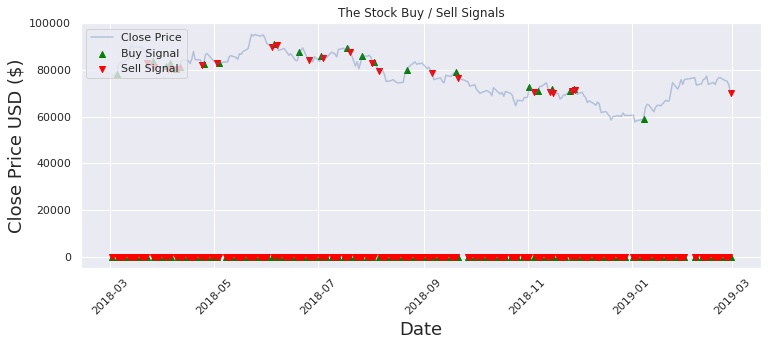

In [168]:
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( df['종가'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [157]:
df['OBV']= df['OBV_EMA'].astype(int)

+매수 2018-03-05  78300.00
-매도 2018-03-23  83100.00
+매수 2018-03-26  84000.00
-매도 2018-03-27  81400.00
+매수 2018-04-03  81800.00
-매도 2018-04-04  80400.00
+매수 2018-04-05  82900.00
-매도 2018-04-06  80300.00
+매수 2018-04-09  80600.00
-매도 2018-04-10  80400.00
+매수 2018-04-11  81200.00
-매도 2018-04-24  82100.00
+매수 2018-04-25  82400.00
-매도 2018-05-03  82900.00
+매수 2018-05-04  83000.00
-매도 2018-06-04  89800.00
+매수 2018-06-05  91000.00
-매도 2018-06-07  90900.00
+매수 2018-06-20  87800.00
-매도 2018-06-26  84300.00
+매수 2018-07-03  86100.00
-매도 2018-07-04  85000.00
+매수 2018-07-18  89300.00
-매도 2018-07-20  87900.00
+매수 2018-07-27  86100.00
-매도 2018-08-02  83200.00
+매수 2018-08-03  83300.00
-매도 2018-08-06  79400.00
+매수 2018-08-22  79800.00
-매도 2018-09-06  78800.00
+매수 2018-09-20  79100.00
-매도 2018-09-21  76700.00
+매수 2018-11-02  72600.00
-매도 2018-11-05  70500.00
+매수 2018-11-07  70800.00
-매도 2018-11-14  70400.00
+매수 2018-11-15  71800.00
-매도 2018-11-16  70100.00
+매수 2018-11-26  70900.00
-매도 2018-11-27  70800.00


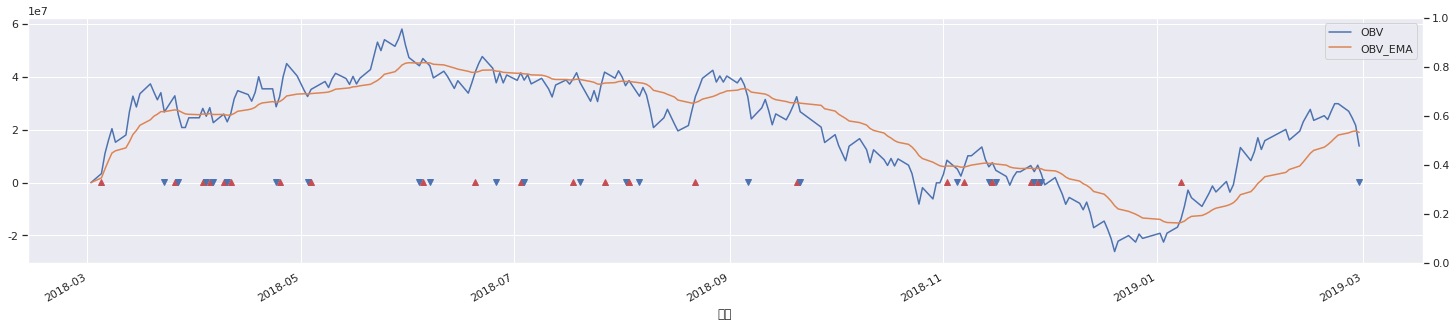

In [164]:
fig, ax1 = plt.subplots(figsize = (25, 5))

df[['OBV', 'OBV_EMA']].plot(ax=ax1)

for i in range(len(df.index)):
    if df["Buy_Signal_Price"].values[i] > df["Sell_Signal_Price"].values[i] :    #콜든크로스(매수)
        print(f"+매수 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Buy_Signal_Price'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['Buy_Signal_Price'].values[i], 'r^')
    elif df["Buy_Signal_Price"].values[i] < df["Sell_Signal_Price"].values[i] :  #데드크로스(매도)
        print(f"-매도 {pd.to_datetime(df.index.values[i]).strftime('%Y-%m-%d')}  {df['Sell_Signal_Price'].values[i]:.2f}")
        ax1.plot(df.index.values[i], df['Sell_Signal_Price'].values[i], 'bv')    

ax2 = ax1.twinx()
#df['Close'].plot(ax=ax2,  color='green', linestyle='dotted')
ax2.grid(False)
#ax2.legend()

plt.show()

In [237]:
tickers = ['000600','090430','033780','002790','036570']
tickers

['000600', '090430', '033780', '002790', '036570']

In [227]:
df = stock.get_market_ohlcv ( "20180301" , "20190301" , "000660" )

In [ ]:
tickers 

In [228]:
df.head(5)

,시가,고가,저가,종가,거래량
날짜,,,,,
2018-03-02,76300,77800,75900,77400,2673152
2018-03-05,77500,78900,77100,78300,3415061
2018-03-06,80100,82500,80000,82400,7588369
2018-03-07,83600,83900,82400,82700,4992841
2018-03-08,83900,84300,81800,83500,4440076


In [215]:
df

,시가,고가,저가,종가,거래량
날짜,,,,,


In [229]:
def 장기_단기_이평선_수익률(df, Ns, Nl):
    df = df[['종가']].copy()
    df['ma_s'] = df['종가'].rolling(Ns).mean().shift(1)
    df['ma_l'] = df['종가'].rolling(Nl).mean().shift(1)


    cond = (df['ma_s'] > df['ma_l'])  &  (df['ma_l'].pct_change() > 0)
    df['status']= np.where(cond, 1, 0)
    df.iloc[-1,-1] = 0
    
    매수조건 = (df['status']==1) & (df['status'].shift(1)!=1) # 현재 스테이더스가 1이고 전스테이더스가 1이 아닌것만 매수
    매도조건 = (df['status']==0) & (df['status'].shift(1)==1) # 매도조건은 0이고 전 스테이드 값이 1인것만 충족
    수익률 = df.loc[매도조건, '종가'].reset_index(drop=True) / df.loc[매수조건, '종가'].reset_index(drop=True)
   
    return 수익률.cumprod().iloc[-1]

In [230]:
장기_단기_이평선_수익률(df, 3, 30)

0.9490450186884338

In [236]:
import time
tickers = stock.get_index_portfolio_deposit_file('1034')

result = []
for ticker in tickers:
    df2 = stock.get_market_ohlcv_by_date('20200320','20210309', ticker)
    result.append(장기_단기_이평선_수익률(df, 3, 30))
    time.sleep(1)



NameError: ignored

In [235]:
Series(result, tickers)

NameError: ignored